# Aryan Agnihotri


## Research question/interests

1.Interested in analyzing different categories of the dataset especially where there have been failures and success within the goals
What are the statistics (averages/mean) of these success/failure rates of the goals? How much is being pledged that is actually relevant or successfull to the projects? Are there specific categories or areas that are relating to these outcomes (success/failures)? I will focus primarily on the columns/categories and their attributes relating to success and failure rates distributed throughout the state.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
df = pd.read_csv("../data/raw/ks-projects-201801.csv")
df.head() #first 5 rows, if needed to load all, it is df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Milestone 3



## Task 1: EDA

##### In order to understand the dataset, we need to first showcase what it actually demonstrates to the public eye. 

In [ ]:
#return number of rows by columns within my dataset
df.shape

(378661, 15)

This tells us that there are 378661 rows and 15 columns

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


This shows us some example values for the first 5 rows

In [ ]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

Get the column names to analyze 

we need to figure out which columns are unique and which are redundant also what the rows describe (for clarity later on)

In [ ]:
df.nunique(axis=0) #we get the unique values in the table
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) #prints the count, mean, standard deviation...etc. of the rows

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000000,378661.000000,378661.000000,378661.000000,374864.000000,378661.000000,378661.000000
mean,1074731191.988755,49080.791521,9682.979339,105.617476,7036.728867,9058.924074,45454.401465
std,619086204.322633,1183391.259092,95636.010005,907.185035,78639.745308,90973.343107,1152950.055089
min,5971.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,538263516.000000,2000.000000,30.000000,2.000000,16.980000,31.000000,2000.000000
50%,1075275634.000000,5200.000000,620.000000,12.000000,394.720000,624.330000,5500.000000
75%,1610148624.000000,16000.000000,4076.000000,56.000000,3034.090000,4050.000000,15500.000000
max,2147476221.000000,100000000.000000,20338986.270000,219382.000000,20338986.270000,20338986.270000,166361390.710000


Here we can see that from the 15 columns we had, only 7 are printed due to redudancy and uniqueness. For example, "ID" is the primary key as it recognizes which project it is without duplication 

Another analysis we need to note is the success/failure rate of the goals. To make it more clear, we need to remove the attributes and columns 
that do not have success/failure in the given state.

In [ ]:
df = df.loc[df['state'].isin(['successful', 'failed'])]
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,failed,4,US,0.0,154.0,6500.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


Now if we relate this to the initial table, when we had gotten the initial (378661, 15) row x column, we can see that the rows have decreased 
(331675, 15) allowing for more calrity and coherence for the analysis.

It is time to analyze the distribution of goals of projects that failed and those that were successful


As we can see, the failure of goals  is significantly higher than the successful ones, and the pledged damount is more successful than failed 
according to the state

In [ ]:
print("Looking for Goal and money pledged mean through state distribution ")
print(round(df.groupby(["state"])["goal", "usd_pledged_real"].mean(),2))
#splitting data and grouping by based on state then finding average 



Looking for Goal and money pledged mean through state distribution 
                goal  usd_pledged_real
state                                 
failed      67346.85            1320.6
successful  10162.96           22670.8


C:\Users\aryan\AppData\Local\Temp\ipykernel_9432\2293331554.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(round(df.groupby(["state"])["goal", "usd_pledged_real"].mean(),2))


This can be seen in a visualization 

Text(0.5, 1.0, 'Correlation of success and failure rate between state')

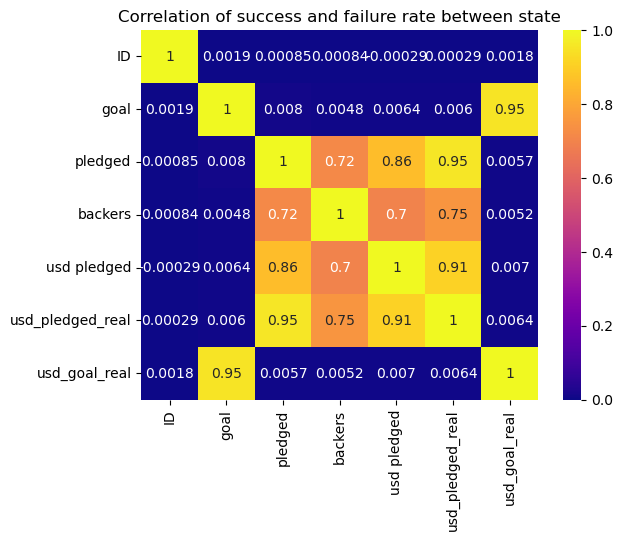

In [ ]:
rawData = df.copy()
rawDataMatrix = df.corr()
sns.heatmap(rawDataMatrix, annot=True, cmap='plasma')
plt.title("Correlation of success and failure rate between state")

Here we see the some columns that are not used such as ID and backers. Also pledged and usd_real_pledged have the same values so one of them will be dropped. I will remove them in task 2, but right now this visualization illustrates a
changes between the values of goals, and pledges by state. We can see a positive correlation which showcases how success/failure rates changed over time (similar to temperature) by state ofcourse. This may seem odd at first but as we go through the analysis with different visualizations, it will 
make more sense.

Another visualization, but this time, the analysis is based on goals and pledges. This is crucial in understanding success/failure,
as a project/category is categorized as successful if amount pledged is greater than the goal and not successfull if amount pledged less than goal. Basic common sense but more perceptible with illustrations. First I will begin by showcasing the most successfull categories with a percentage list to allow the differences to be more clear (with designated values)

(0.0, 7396.799999999999)

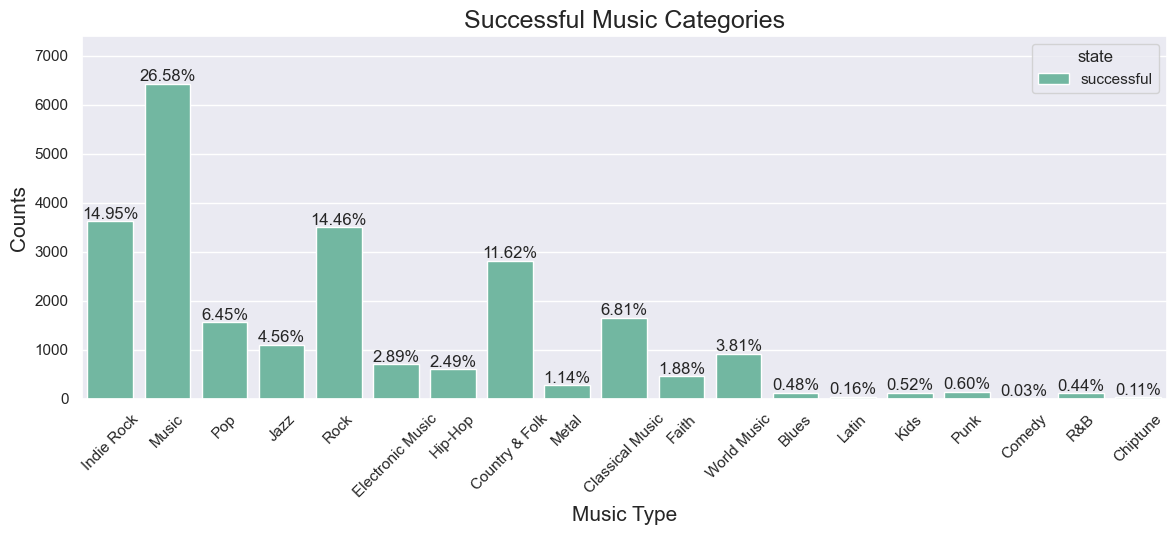

In [ ]:
MusicDf = df[(df['main_category'] == 'Music') & (df['state'] == 'successful')] #filter by successfull
plt.figure(figsize=(14,16))
total = len(df)
plt.subplot(311)
graphMusic = sns.countplot(x='category', data=MusicDf, hue = 'state', palette = 'BuGn_r')
graphMusic.set_xticklabels(graphMusic.get_xticklabels(),rotation=45)
graphMusic.set_title("Successful Music Categories", fontsize=18)
graphMusic.set_xlabel("Music Type", fontsize=15)
graphMusic.set_ylabel("Counts", fontsize=15)
percentages=[]
for i in graphMusic.patches:
    height = i.get_height()
    percentages.append(height)
    graphMusic.text(i.get_x()+i.get_width()/2.,
    height + 55,
    '{:1.2f}%'.format(height/len(MusicDf)*100),
    ha="center", fontsize=12) 
graphMusic.set_ylim(0, max(percentages) * 1.15)

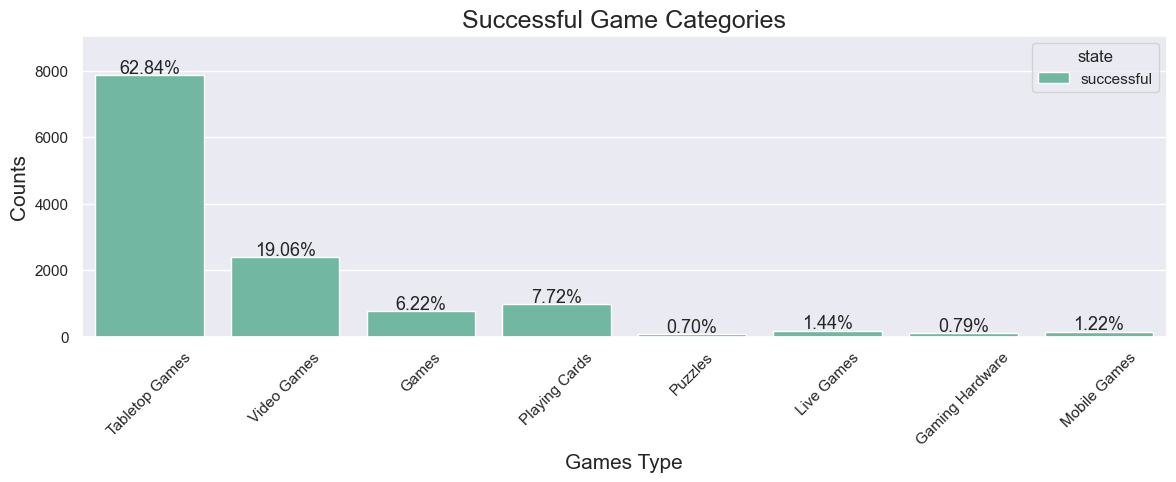

In [ ]:
GamesDf = df[(df['main_category'] == 'Games') & (df['state'] == 'successful')]

plt.figure(figsize=(14,16))
total = len(df)
plt.subplot(311)

graphGames = sns.countplot(x='category', data=GamesDf,hue = 'state', palette = 'BuGn_r')
graphGames.set_xticklabels(ax2.get_xticklabels(),rotation=45)
graphGames.set_title("Successful Game Categories", fontsize=18)
graphGames.set_xlabel("Games Type", fontsize=15)
graphGames.set_ylabel("Counts", fontsize=15)
percentages=[]
for i in graphGames.patches:
    height = i.get_height()
    percentages.append(height)
    graphGames.text(i.get_x()+i.get_width()/2.,
    height + 55,
    '{:1.2f}%'.format(height/len(GamesDf)*100),
    ha="center", fontsize=13) 
graphGames.set_ylim(0, max(percentages) * 1.15)
plt.subplots_adjust(wspace = 0.1, hspace = 0.6,top = 0.9)


(0.0, 7673.95)

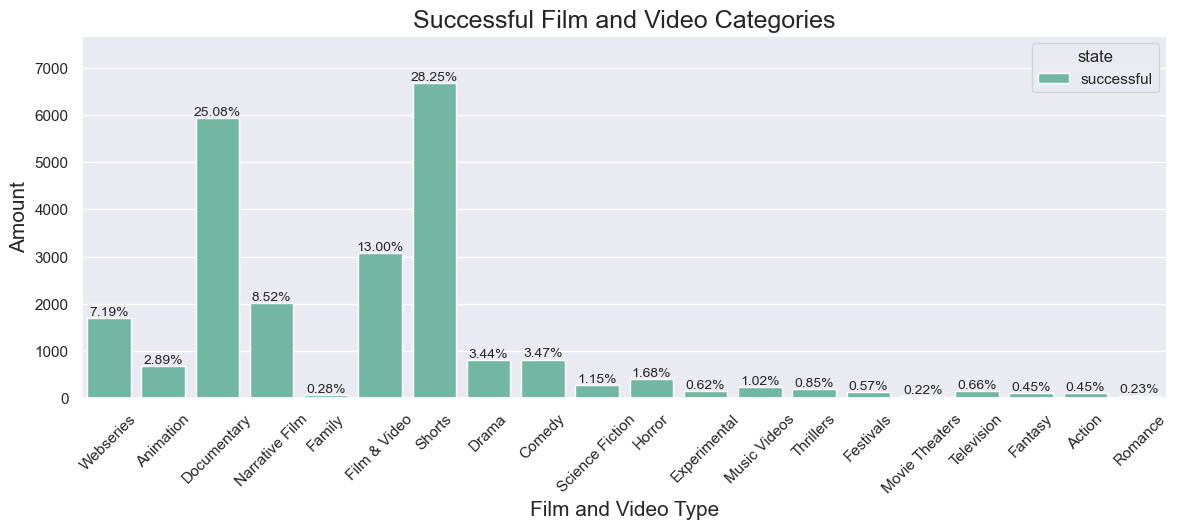

In [ ]:
FilmVideoDf = df[(df['main_category'] == 'Film & Video') & (df['state'] == 'successful')]
plt.figure(figsize=(14,16))
total = len(df)
plt.subplot(311)
graphFilmVideo = sns.countplot(x='category', data=FilmVideoDf, hue = 'state', palette = 'BuGn_r')
graphFilmVideo.set_xticklabels(ax1.get_xticklabels(),rotation=45)
graphFilmVideo.set_title("Successful Film and Video Categories", fontsize = 18)
graphFilmVideo.set_xlabel("Film and Video Type", fontsize = 15)
graphFilmVideo.set_ylabel("Amount", fontsize = 15)
percentages=[]
for i in graphFilmVideo.patches:
    height = i.get_height()
    percentages.append(height)
    graphFilmVideo.text(i.get_x()+i.get_width()/2., #showcasing the percentages ontop of the bars
    height + 55,
    '{:1.2f}%'.format(height/len(FilmVideoDf)*100), #convert to percentages
    ha="center", fontsize=10) 
graphFilmVideo.set_ylim(0, max(percentages) * 1.15)

As we can see here, in each of the successfull music categories, film video, and games, 
the type or subcategories also have some that are not as popular,thus failures. To make it visually more appealing and distinct, I used green
as my color pallette to show 'success'. Within the visualization, one can see that indie and rock are extremely successful compared to the others with a whopping 14.95% and 14.46%! Shortfilms are the highest with 28% and tabletopgames boulder over all with 62%.

Now I will visually illustrate using a similar plot algorithm to design the failures subdivided into 3 plots

(0.0, 9888.849999999999)

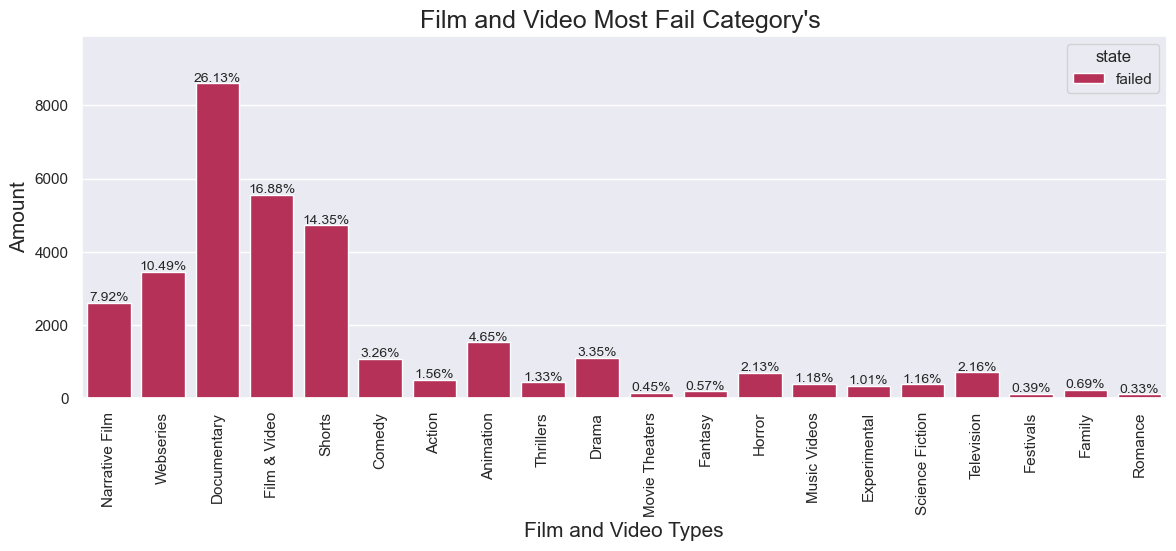

In [ ]:
FilmsFailed = df[(df['main_category'] == 'Film & Video') & (df['state'] == 'failed')] #filter by failed
plt.figure(figsize=(14,16))

plt.subplot(3,1,1)
graphFilms = sns.countplot(x='category', data=FilmsFailed,hue = 'state', palette = 'rocket')
graphFilms.set_xticklabels(graphFilms.get_xticklabels(),rotation=90)
graphFilms.set_title("Film and Video Most Fail Category's ", fontsize=18)
graphFilms.set_xlabel("Film and Video Types", fontsize=15)
graphFilms.set_ylabel("Amount", fontsize=15)
percentages=[]
for i in graphFilms.patches:
    height = i.get_height()
    percentages.append(height)
    graphFilms.text(i.get_x()+i.get_width()/2.,
    height + 55,
    '{:1.2f}%'.format(height/len(FilmsFailed)*100),
     ha="center", fontsize=10) 
graphFilms.set_ylim(0, max(percentages) * 1.15)



(0.0, 6756.249999999999)

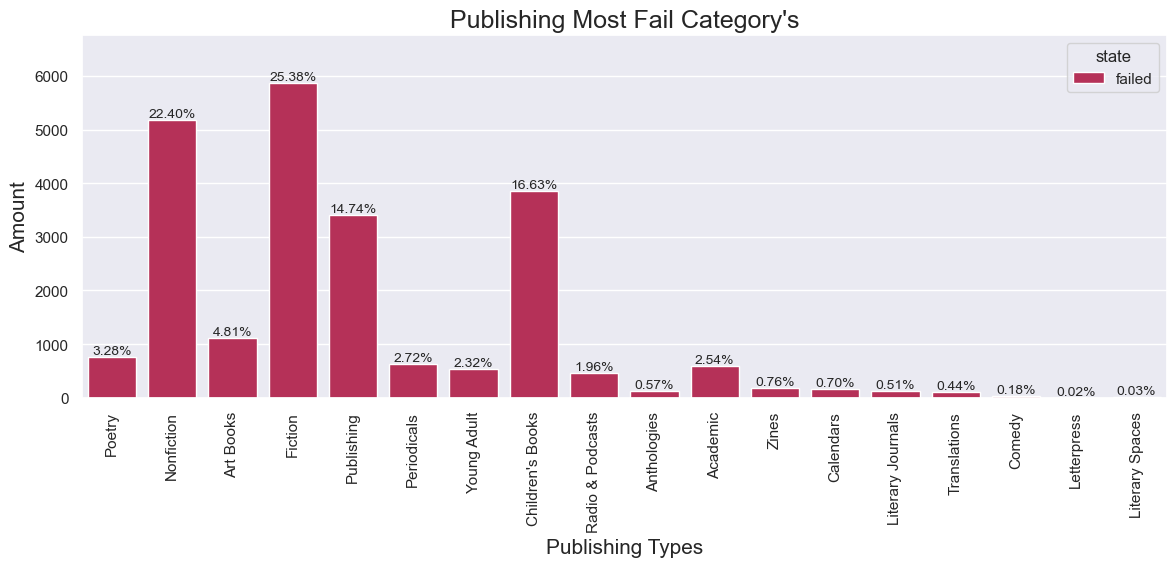

In [ ]:
PublishingFailed = df[(df['main_category'] == 'Publishing') & (df['state'] == 'failed')]
plt.figure(figsize=(14,16))

plt.subplot(3,1,1)
graphPublishing = sns.countplot(x='category', data=PublishingFailed, hue = 'state', palette = 'rocket')
graphPublishing.set_xticklabels(graphPublishing.get_xticklabels(),rotation=90)
graphPublishing.set_title("Publishing Most Fail Category's", fontsize=18)
graphPublishing.set_xlabel("Publishing Types", fontsize=15)
graphPublishing.set_ylabel("Amount", fontsize=15)
percentages=[]
for i in graphPublishing.patches:
    height = i.get_height()
    percentages.append(height)
    graphPublishing.text(i.get_x()+i.get_width()/2.,
    height + 55,
    '{:1.2f}%'.format(height/len(PublishingFailed)*100),
    ha="center", fontsize=10) 
graphPublishing.set_ylim(0, max(percentages) * 1.15)

(0.0, 7131.15)

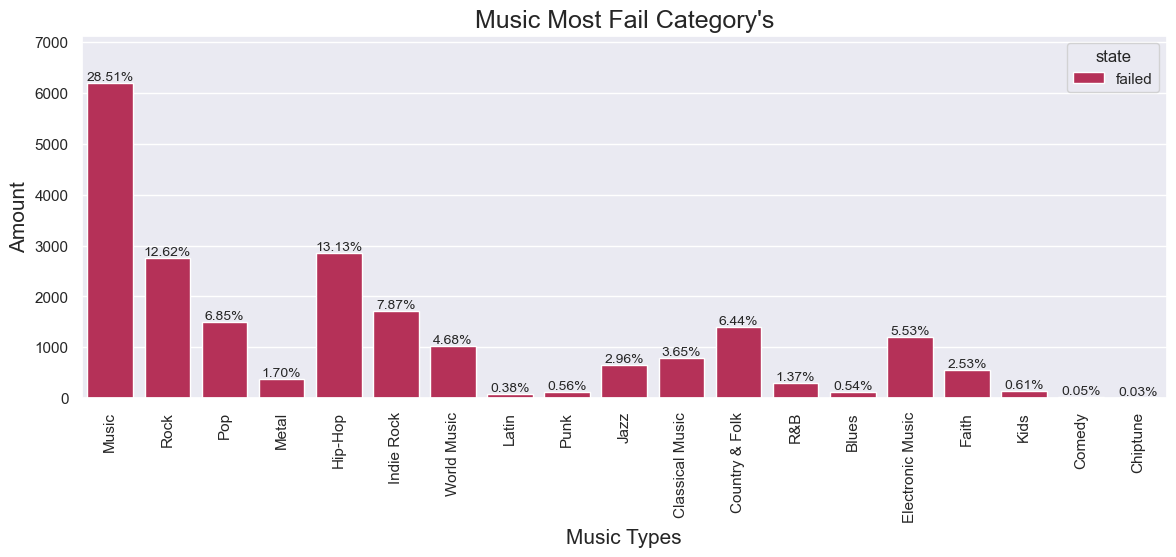

In [ ]:
MusicFailed = df[(df['main_category'] == 'Music') & (df['state'] == 'failed')]
plt.figure(figsize=(14,16))
plt.subplot(3,1,1)
graphMusic= sns.countplot(x='category', data=MusicFailed, hue = 'state', palette='rocket')
graphMusic.set_xticklabels(graphMusic.get_xticklabels(),rotation=90)
graphMusic.set_title("Music Most Fail Category's", fontsize=18)
graphMusic.set_xlabel("Music Types", fontsize=15)
graphMusic.set_ylabel("Amount", fontsize=15)
percentages=[]
for i in graphMusic.patches:
    height = i.get_height()
    percentages.append(height)
    graphMusic.text(i.get_x()+i.get_width()/2.,
    height + 55,
    '{:1.2f}%'.format(height/len(MusicFailed)*100),
    ha="center", fontsize=10) 
graphMusic.set_ylim(0, max(percentages) * 1.15)


As we can see here fiction has a high failure rate in the category publishing and documentaries in film/video. The reason for this could be 
preferences, time spent, and surveys. 

Now I will examine the differences between the pledged distribution of successful projects and failed projects 


C:\Users\aryan\AppData\Local\Temp\ipykernel_9432\1254773827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['usd_goal_real'] < 200) &
C:\Users\aryan\AppData\Local\Temp\ipykernel_9432\1254773827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['usd_goal_real'] < 200) &


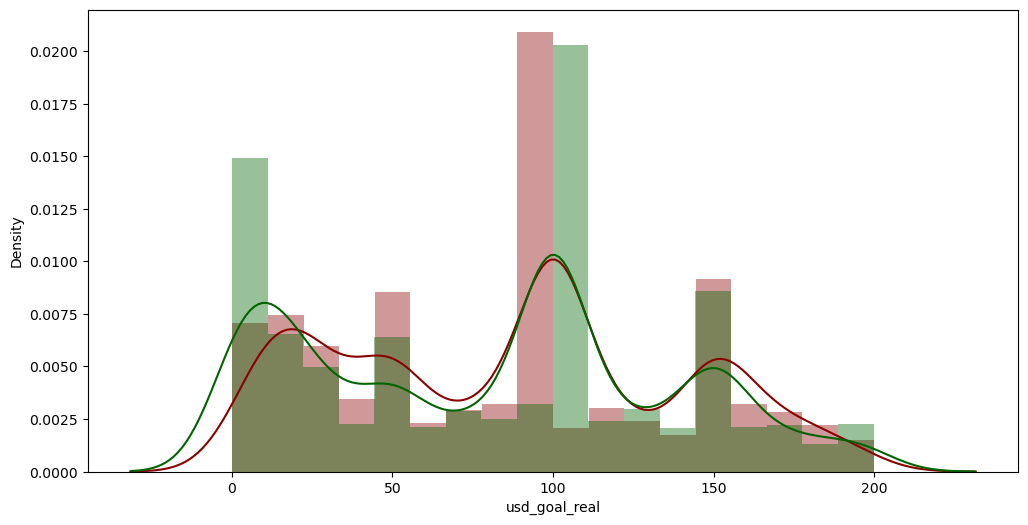

In [ ]:
#distplot will be discontinued but this visualizes my results more efficiently according to this visualization
plt.figure(figsize = (12,6))
sns.distplot(df[(df['usd_goal_real'] < 200) & 
                     (df['state'] == 'failed')]['usd_goal_real'], color='darkred')
sns.distplot(df[(df['usd_goal_real'] < 200) & 
                     (df['state'] == 'successful')]['usd_goal_real'],color='darkgreen')
plt.show()

The density distribution shown here between the success/failure rates of the pledged goal really illustrates the correlation of how fast the x and y
values are changing. In simpler words, how fast pledged goal is changing instantaenously. 

## Task 2: Analysis Pipeline

Step 1: Load data (done)

Step 2: Clean Data

Here I am removing columns that are not needed, as mentioned earlier, ID column is not related to my data analysis. The only important columns are pledged columns, state, categories, and goals for distribution of $ and success/failure rate as demonstrated in my analysis. Pledged and usd_pledged_real have the same pledge amounts so one of them will be dropped and the other will be renamed. 

In [ ]:
rawDat = df.copy()
rawDat = rawDat.loc[rawDat['state'].isin(['successful','failed'])]
rawDat = df.drop(['currency','country', 'usd pledged', 'pledged', 'ID', 'name','deadline', 'launched', 'backers'], axis=1)
rawDat.nunique()
rawDat.head()


,category,main_category,goal,state,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,1000.0,failed,0.0,1533.95
1,Narrative Film,Film & Video,30000.0,failed,2421.0,30000.00
2,Narrative Film,Film & Video,45000.0,failed,220.0,45000.00
3,Music,Music,5000.0,failed,1.0,5000.00
5,Restaurants,Food,50000.0,successful,52375.0,50000.00


Now the only thing left to do is rename the columns for clarity and coherence. We will keep all the pledges as they relate to my visualizations. For example usd_pledged_real and pledged = amount of $ the project realised at the deadline after finding out if it succeeded or failed (so pledged will be dropped and usd_pledged_real will be renamed to pledged)
usd_goal_real is the amount of $ the project asked for initially for it to succeed

Step 3/4 : Wrangle/Process Data (some have been done earlier in the analysis as I went along)

In [ ]:
print("Looking for Goal and money pledged mean through state distribution ")
print(round(df.groupby(["state"])["goal", "usd_pledged_real"].mean(),2))

Looking for Goal and money pledged mean through state distribution 
                goal  usd_pledged_real
state                                 
failed      67346.85            1320.6
successful  10162.96           22670.8


C:\Users\aryan\AppData\Local\Temp\ipykernel_9432\487204453.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(round(df.groupby(["state"])["goal", "usd_pledged_real"].mean(),2))


In [ ]:
rawDat = rawDat.rename(columns={'category': 'Type (Subcategory)', 'usd_pledged_real': 'deadline_pledge', 'usd_goal_real': 'initial_pledge'})
rawDat.head()


,Type (Subcategory),main_category,goal,state,deadline_pledge,initial_pledge
0,Poetry,Publishing,1000.0,failed,0.0,1533.95
1,Narrative Film,Film & Video,30000.0,failed,2421.0,30000.00
2,Narrative Film,Film & Video,45000.0,failed,220.0,45000.00
3,Music,Music,5000.0,failed,1.0,5000.00
5,Restaurants,Food,50000.0,successful,52375.0,50000.00


## Task 3: Method Chaining

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

def load_and_process(path_csv):
    
    df1 = (
         pd.read_csv(path_csv)
        .drop(['currency','country', 'usd pledged', 'pledged', 'ID', 'name','deadline', 'launched', 'backers'], axis=1)
        .rename(columns={'category': 'Type (Subcategory)', 'usd_pledged_real': 'deadline_pledge', 'usd_goal_real': 'initial_pledge'})
        .reindex(['Type (Subcategory)','main_category','goal','state','deadline_pledge','initial_pledge'], axis=1)
    )
    df2 = (
        df1.loc[df1['state'].isin(
            ['successful', 'failed'])]
    )
  
    return df2

In [ ]:
import project_functions3 as p3

### After chaining/changes

In [ ]:
dfp = p3.load_and_process("../data/raw/ks-projects-201801.csv")
dfp.head()

,Type (Subcategory),main_category,goal,state,deadline_pledge,initial_pledge
0,Poetry,Publishing,1000.0,failed,0.0,1533.95
1,Narrative Film,Film & Video,30000.0,failed,2421.0,30000.00
2,Narrative Film,Film & Video,45000.0,failed,220.0,45000.00
3,Music,Music,5000.0,failed,1.0,5000.00
5,Restaurants,Food,50000.0,successful,52375.0,50000.00


Prints exactly as I wanted after the changes have been made aka after method chaining, so it works!

## Task 4: Conduct Analysis
